In [11]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6940 - val_loss: 0.6939


# 1. Add one more hidden layer to autoencoder

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)  # Adding one more hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)  # Adding one more hidden layer
decoded = Dense(784, activation='sigmoid')(decoded)
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# This model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics ='accuracy')

from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 5s 17ms/step - loss: 0.6931 - accuracy: 0.0013 - val_loss: 0.6930 - val_accuracy: 0.0020
Epoch 2/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6930 - accuracy: 0.0014 - val_loss: 0.6930 - val_accuracy: 0.0019
Epoch 3/5
235/235 [==============================] - 5s 21ms/step - loss: 0.6929 - accuracy: 0.0014 - val_loss: 0.6929 - val_accuracy: 0.0018
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6928 - accuracy: 0.0014 - val_loss: 0.6928 - val_accuracy: 0.0018
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6927 - accuracy: 0.0015 - val_loss: 0.6927 - val_accuracy: 0.0017


# 2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib


313/313 [==============================] - 2s 4ms/step


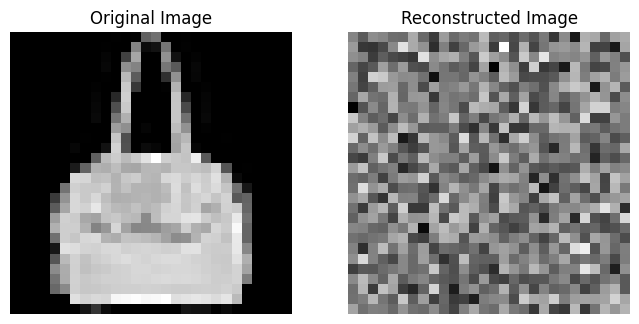

In [ ]:
import matplotlib.pyplot as plt

# Predict reconstructed images
reconstructed_images = autoencoder.predict(x_test)

# Choose a random index for visualization
index = np.random.randint(0, len(x_test))

# Original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images[index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6951 - val_loss: 0.6949
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6948 - val_loss: 0.6946
Epoch 3/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - val_loss: 0.6941
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6928 - val_los

# 3.Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib


313/313 [==============================] - 1s 3ms/step


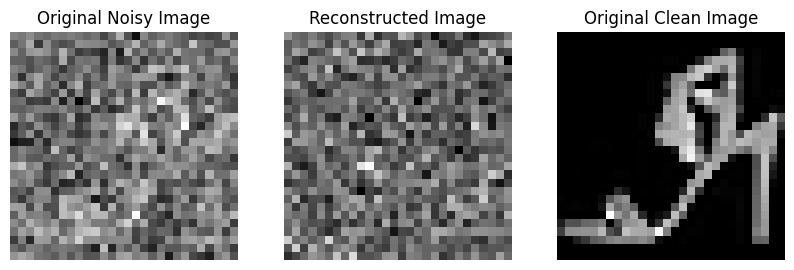

In [ ]:
import matplotlib.pyplot as plt

# Predict reconstructed images
reconstructed_images = autoencoder.predict(x_test_noisy)

# Choose a random index for visualization
index = np.random.randint(0, len(x_test_noisy))

# Original noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

# Reconstructed image
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_images[index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

# Original clean image
plt.subplot(1, 3, 3)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Clean Image')
plt.axis('off')

plt.show()


# 4.plot loss and accuracy using the history object

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.6933 - accuracy: 0.0014 - val_loss: 0.6933 - val_accuracy: 0.0015
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6932 - accuracy: 0.0014 - val_loss: 0.6932 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6931 - accuracy: 0.0014 - val_loss: 0.6930 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6929 - accuracy: 0.0014 - val_loss: 0.6929 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6928 - accuracy: 0.0014 - val_loss: 0.6927 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6926 - accuracy: 0.0014 - val_loss: 0.6926 - val_accuracy: 0.0014
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.6925 - accuracy: 0.0014 - val_loss: 0.6925 - val_accuracy: 0.0014

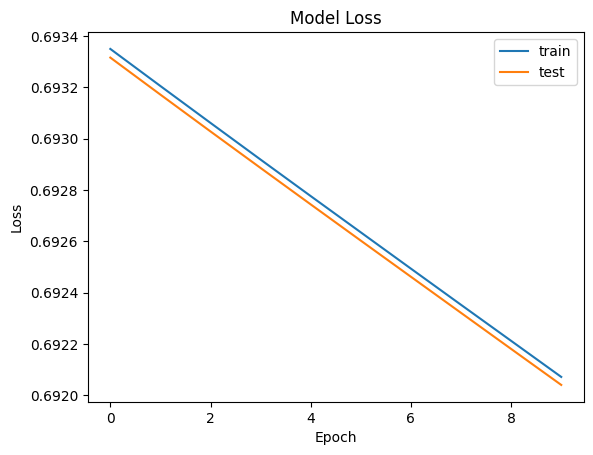

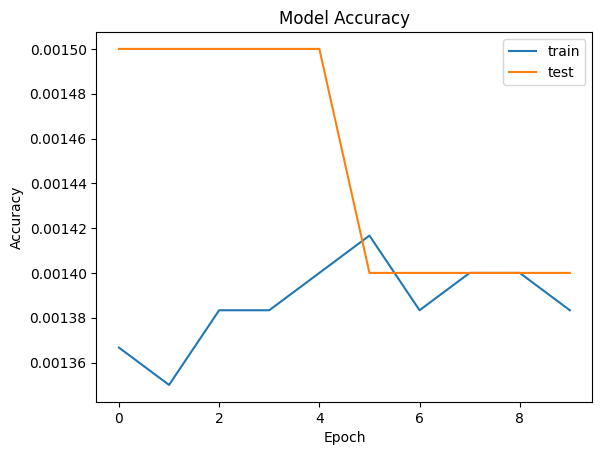

In [15]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()